Let's start by importing some useful libraries

In [ ]:
pip install dmba

In [ ]:
import os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
boston_df = pd.read_csv('/content/drive/MyDrive/NEU IE 7275 Colab Notebooks/BostonHousing.csv')

In [ ]:
type(boston_df)

pandas.core.frame.DataFrame

In [ ]:
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000,0
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600,0
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700,1
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940,33.400,1
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330,36.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0,0.573,6.593,69.100,2.479,1,273,21.000,9.670,22.400,0
502,0.045,0.000,11.930,0,0.573,6.120,76.700,2.288,1,273,21.000,9.080,20.600,0
503,0.061,0.000,11.930,0,0.573,6.976,91.000,2.167,1,273,21.000,5.640,23.900,0
504,0.110,0.000,11.930,0,0.573,6.794,89.300,2.389,1,273,21.000,6.480,22.000,0


In [ ]:
boston_df.shape

(506, 14)

In [ ]:
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000,0
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600,0
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700,1
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940,33.400,1
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330,36.200,1
5,0.030,0.000,2.180,0,0.458,6.430,58.700,6.062,3,222,18.700,5.210,28.700,0
6,0.088,12.500,7.870,0,0.524,6.012,66.600,5.561,5,311,15.200,12.430,22.900,0
7,0.145,12.500,7.870,0,0.524,6.172,96.100,5.950,5,311,15.200,19.150,27.100,0
8,0.211,12.500,7.870,0,0.524,5.631,100.000,6.082,5,311,15.200,29.930,16.500,0
9,0.170,12.500,7.870,0,0.524,6.004,85.900,6.592,5,311,15.200,17.100,18.900,0


In [ ]:
boston_df.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
503,0.061,0.000,11.930,0,0.573,6.976,91.000,2.167,1,273,21.000,5.640,23.900,0
504,0.110,0.000,11.930,0,0.573,6.794,89.300,2.389,1,273,21.000,6.480,22.000,0
505,0.047,0.000,11.930,0,0.573,6.030,80.800,2.505,1,273,21.000,7.880,11.900,0


In [ ]:
boston_df.isna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
boston_df.index

RangeIndex(start=0, stop=506, step=1)

In [ ]:
boston_df['RM']

0     6.575
1     6.421
2     7.185
3     6.998
4     7.147
       ... 
501   6.593
502   6.120
503   6.976
504   6.794
505   6.030
Name: RM, Length: 506, dtype: float64

In [ ]:
boston_df.RM

0     6.575
1     6.421
2     7.185
3     6.998
4     7.147
       ... 
501   6.593
502   6.120
503   6.976
504   6.794
505   6.030
Name: RM, Length: 506, dtype: float64

In [ ]:
boston_df[['RM','AGE']]

,RM,AGE
0,6.575,65.200
1,6.421,78.900
2,7.185,61.100
3,6.998,45.800
4,7.147,54.200
...,...,...
501,6.593,69.100
502,6.120,76.700
503,6.976,91.000
504,6.794,89.300


In [ ]:
np.mean(boston_df['TAX'])

408.2371541501976

In [ ]:
np.median(boston_df['MEDV'])

21.2

In [ ]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.533,0.166
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.197,0.372
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000,0.000
25%,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.100,4.000,279.000,17.400,6.950,17.025,0.000
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200,0.000
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,16.955,25.000,0.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,37.970,50.000,1.000


In [ ]:
boston_df.columns = [h.strip().replace('.','_') for h in boston_df.columns]

In [ ]:
boston_df = boston_df.rename(str.lower,axis=1)
boston_df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_ medv
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000,0
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600,0
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700,1
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940,33.400,1
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330,36.200,1
5,0.030,0.000,2.180,0,0.458,6.430,58.700,6.062,3,222,18.700,5.210,28.700,0
6,0.088,12.500,7.870,0,0.524,6.012,66.600,5.561,5,311,15.200,12.430,22.900,0
7,0.145,12.500,7.870,0,0.524,6.172,96.100,5.950,5,311,15.200,19.150,27.100,0
8,0.211,12.500,7.870,0,0.524,5.631,100.000,6.082,5,311,15.200,29.930,16.500,0
9,0.170,12.500,7.870,0,0.524,6.004,85.900,6.592,5,311,15.200,17.100,18.900,0


In [ ]:
boston_df.iloc[0,:]

crim          0.006
zn           18.000
indus         2.310
chas          0.000
nox           0.538
rm            6.575
age          65.200
dis           4.090
rad           1.000
tax         296.000
ptratio      15.300
lstat         4.980
medv         24.000
cat_ medv     0.000
Name: 0, dtype: float64

In [ ]:
boston_df.iloc[:,0]

0     0.006
1     0.027
2     0.027
3     0.032
4     0.069
       ... 
501   0.063
502   0.045
503   0.061
504   0.110
505   0.047
Name: crim, Length: 506, dtype: float64

In [ ]:
boston_df.iloc[0:3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_ medv
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000,0
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600,0
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700,1


In [ ]:
boston_df['medv'].iloc[4:6]

4   36.200
5   28.700
Name: medv, dtype: float64

In [ ]:
boston_df.iloc[4:6]['medv']

4   36.200
5   28.700
Name: medv, dtype: float64

In [ ]:
boston_df.iloc[4:6].medv

4   36.200
5   28.700
Name: medv, dtype: float64

In [ ]:
boston_df.iloc[4,0:3]

crim    0.069
zn      0.000
indus   2.180
Name: 4, dtype: float64

In [ ]:
boston_df.iloc[4][0:3]

crim    0.069
zn      0.000
indus   2.180
Name: 4, dtype: float64

In [ ]:
boston_df.iloc[4:6,0:3]

,crim,zn,indus
4,0.069,0.000,2.180
5,0.030,0.000,2.180


In [ ]:
pd.concat([boston_df.iloc[3:5,2:4],boston_df.iloc[3:5,8:12]],axis=1)

,indus,chas,rad,tax,ptratio,lstat
3,2.180,0,3,222,18.700,2.940
4,2.180,0,3,222,18.700,5.330


In [ ]:
pd.concat([boston_df.iloc[1:4,2:4],boston_df.iloc[7:9,2:4]],axis=0)

,indus,chas
1,7.070,0
2,7.070,0
3,2.180,0
7,7.870,0
8,7.870,0


In [ ]:
boston_df[['medv','rm']]

,medv,rm
0,24.000,6.575
1,21.600,6.421
2,34.700,7.185
3,33.400,6.998
4,36.200,7.147
...,...,...
501,22.400,6.593
502,20.600,6.120
503,23.900,6.976
504,22.000,6.794


In [ ]:
boston_df.age.describe()

count   506.000
mean     68.575
std      28.149
min       2.900
25%      45.025
50%      77.500
75%      94.075
max     100.000
Name: age, dtype: float64

In [ ]:
boston_df[boston_df['age']> 97]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_ medv
8,0.211,12.500,7.870,0,0.524,5.631,100.000,6.082,5,311,15.200,29.930,16.500,0
20,1.252,0.000,8.140,0,0.538,5.570,98.100,3.798,4,307,21.000,21.020,13.600,0
23,0.988,0.000,8.140,0,0.538,5.813,100.000,4.095,4,307,21.000,19.880,14.500,0
31,1.355,0.000,8.140,0,0.538,6.072,100.000,4.175,4,307,21.000,13.040,14.500,0
108,0.128,0.000,8.560,0,0.520,6.474,97.100,2.433,5,384,20.900,12.270,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,6.393,0.000,18.100,0,0.584,6.162,97.400,2.206,24,666,20.200,24.100,13.300,0
477,15.023,0.000,18.100,0,0.614,5.304,97.300,2.101,24,666,20.200,24.910,12.000,0
489,0.183,0.000,27.740,0,0.609,5.414,98.300,1.755,4,711,20.100,23.970,7.000,0
490,0.207,0.000,27.740,0,0.609,5.093,98.000,1.823,4,711,20.100,29.680,8.100,0


In [ ]:
boston_df[(boston_df['age']> 90) & (boston_df['rm']> 6) ] 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_ medv
7,0.145,12.500,7.870,0,0.524,6.172,96.100,5.950,5,311,15.200,19.150,27.100,0
10,0.225,12.500,7.870,0,0.524,6.377,94.300,6.347,5,311,15.200,20.450,15.000,0
22,1.232,0.000,8.140,0,0.538,6.142,91.700,3.977,4,307,21.000,18.720,15.200,0
28,0.773,0.000,8.140,0,0.538,6.495,94.400,4.455,4,307,21.000,12.800,18.400,0
31,1.355,0.000,8.140,0,0.538,6.072,100.000,4.175,4,307,21.000,13.040,14.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,4.038,0.000,18.100,0,0.532,6.229,90.700,3.099,24,666,20.200,12.870,19.600,0
475,6.393,0.000,18.100,0,0.584,6.162,97.400,2.206,24,666,20.200,24.100,13.300,0
476,4.871,0.000,18.100,0,0.614,6.484,93.600,2.305,24,666,20.200,18.680,16.700,0
478,10.233,0.000,18.100,0,0.614,6.185,96.700,2.171,24,666,20.200,18.030,14.600,0


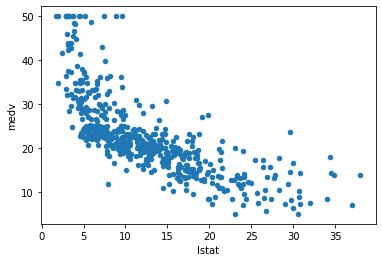

In [ ]:
boston_df.plot.scatter(x='lstat',y='medv');

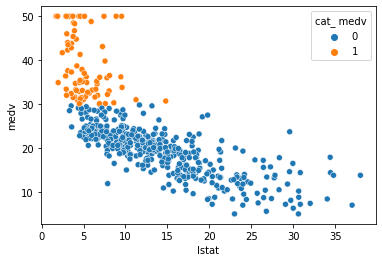

In [ ]:
sn.scatterplot(x=boston_df.lstat, y=boston_df.medv,hue=boston_df['cat_ medv']);

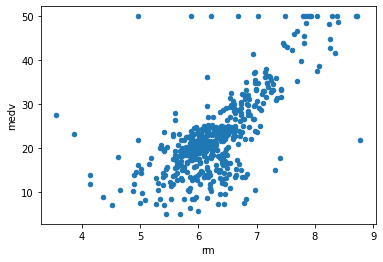

In [ ]:
boston_df.plot.scatter(x='rm',y='medv');

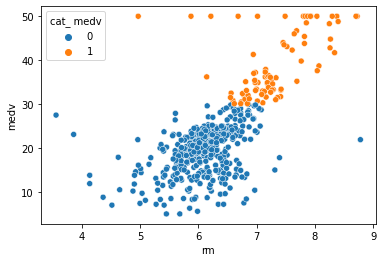

In [ ]:
sn.scatterplot(x=boston_df.rm, y=boston_df.medv,hue=boston_df['cat_ medv']);

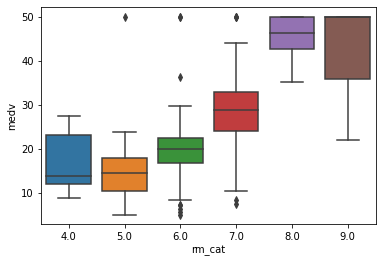

In [ ]:
boston_df['rm_cat'] = round(boston_df['rm'])
sn.boxplot(x=boston_df.rm_cat,y=boston_df.medv);

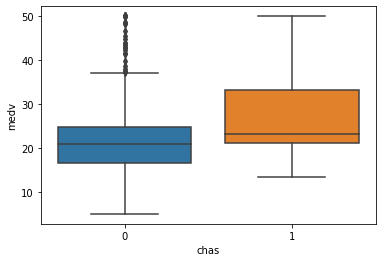

In [ ]:
sn.boxplot(x=boston_df.chas,y=boston_df.medv);

In [ ]:
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv', 'cat_ medv', 'rm_cat'],
      dtype='object')

In [ ]:
boston_df.rad.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: rad, dtype: int64

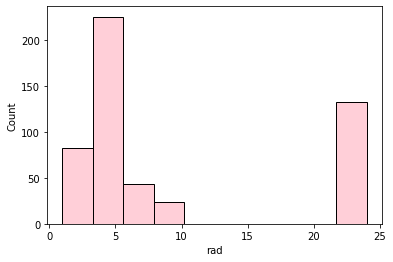

In [ ]:
sn.histplot(boston_df.rad,color="pink");

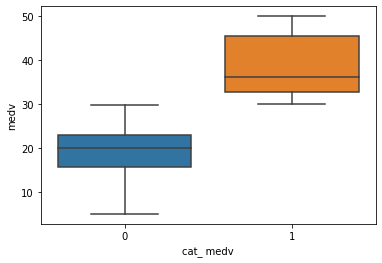

In [ ]:
sn.boxplot(x=boston_df['cat_ medv'],y=boston_df.medv);

In [ ]:
boston_df.groupby('cat_ medv').min()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,rm_cat
cat_ medv,,,,,,,,,,,,,,
0,0.006,0.000,0.740,0,0.385,3.561,2.900,1.137,1,188,13.000,3.330,5.000,4.000
1,0.009,0.000,0.460,0,0.394,4.970,8.400,1.130,1,187,12.600,1.730,30.100,5.000


In [ ]:
boston_df.groupby('cat_ medv').describe()

crim                                                 zn         \
            count  mean   std   min   25%   50%   75%    max   count   mean   
cat_ medv                                                                     
0         422.000 4.196 9.281 0.006 0.098 0.290 4.731 88.976 422.000  7.566   
1          84.000 0.686 1.676 0.009 0.037 0.089 0.536  9.232  84.000 30.440   

           ...   medv         rm_cat                                            
           ...    75%    max   count  mean   std   min   25%   50%   75%   max  
cat_ medv  ...                                                                  
0          ... 23.075 29.900 422.000 6.066 0.564 4.000 6.000 6.000 6.000 9.000  
1          ... 45.550 50.000  84.000 7.274 0.628 5.000 7.000 7.000 8.000 9.000  

[2 rows x 112 columns]

In [ ]:
boston_df.groupby('cat_ medv').agg({'tax':'mean'})

,tax
cat_ medv,
0,428.796
1,304.952


In [ ]:
boston_df.groupby('cat_ medv').agg({'medv': ['min', 'max'], 'age': 'mean'})

medv           age
             min    max   mean
cat_ medv                     
0          5.000 29.900 70.974
1         30.100 50.000 56.524

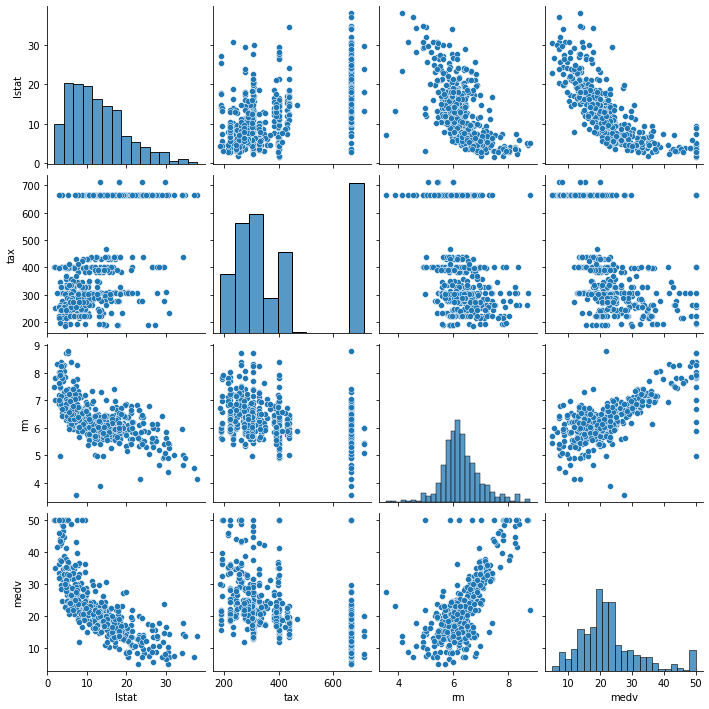

In [ ]:
sn.pairplot(boston_df[['lstat','tax','rm','medv']]);

In [ ]:
boston_df[['lstat','tax','medv']].corr()

,lstat,tax,medv
lstat,1.000,0.544,-0.738
tax,0.544,1.000,-0.469
medv,-0.738,-0.469,1.000


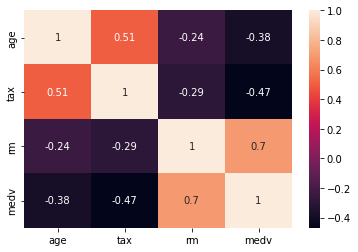

In [ ]:
sn.heatmap(boston_df[['age','tax','rm','medv']].corr(), annot=True);

In [ ]:
boston_df[['tax','rm','age','medv']].corr()

,tax,rm,age,medv
tax,1.000,-0.292,0.506,-0.469
rm,-0.292,1.000,-0.240,0.695
age,0.506,-0.240,1.000,-0.377
medv,-0.469,0.695,-0.377,1.000


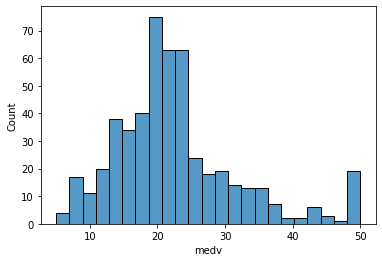

In [ ]:
sn.histplot(boston_df.medv);

In [ ]:
################################################################
################################################################
############## Regression Analyis #############################
################################################################

In [ ]:
boston_df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_ medv,rm_cat
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000,0,7.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600,0,6.000
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700,1,7.000
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940,33.400,1,7.000
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330,36.200,1,7.000
5,0.030,0.000,2.180,0,0.458,6.430,58.700,6.062,3,222,18.700,5.210,28.700,0,6.000
6,0.088,12.500,7.870,0,0.524,6.012,66.600,5.561,5,311,15.200,12.430,22.900,0,6.000
7,0.145,12.500,7.870,0,0.524,6.172,96.100,5.950,5,311,15.200,19.150,27.100,0,6.000
8,0.211,12.500,7.870,0,0.524,5.631,100.000,6.082,5,311,15.200,29.930,16.500,0,6.000
9,0.170,12.500,7.870,0,0.524,6.004,85.900,6.592,5,311,15.200,17.100,18.900,0,6.000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
y= boston_df.medv
X= boston_df[['tax','rm','age','ptratio','dis','lstat','chas','crim']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [ ]:
import statsmodels.api as sm
X2_train = sm.add_constant(X_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.74e-97
Time:                        00:07:20   Log-Likelihood:                -1048.5
No. Observations:                 354   AIC:                             2115.
Df Residuals:                     345   BIC:                             2150.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2809      4.678      3.908      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#mdev= 1.9447 -0.01808*tax + 7.7095*rm - ... + error

In [ ]:
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
train_pred=linear_model_1.predict(X_train)
train_results=pd.DataFrame({'medv':y_train,
                            'predicted':train_pred,
                            'residual':y_train - train_pred})
train_results.head()

,medv,predicted,residual
273,35.200,34.452,0.748
52,25.000,28.414,-3.414
181,36.200,26.324,9.876
452,16.100,18.194,-2.094
381,10.900,17.439,-6.539


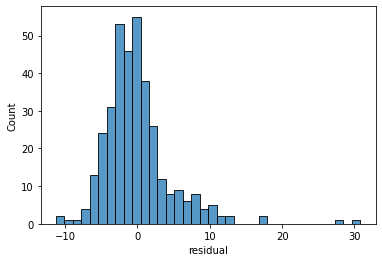

In [ ]:
sn.histplot(train_results.residual);

In [ ]:
train_results.residual.describe()

count   354.000
mean      0.000
std       4.685
min     -11.236
25%      -2.673
50%      -0.687
75%       1.536
max      30.823
Name: residual, dtype: float64

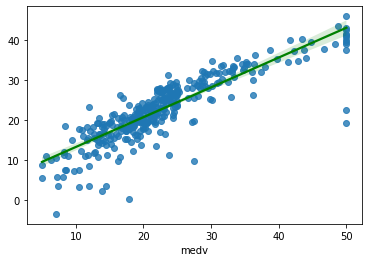

In [ ]:
sn.regplot(x=y_train,y=train_pred,data=train_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_train,train_pred).round(2)

0.74

In [ ]:
test_pred=linear_model_1.predict(X_test)
test_results=pd.DataFrame({'medv':y_test,
                            'predicted':test_pred,
                            'residual':y_test - test_pred})
test_results.head()

,medv,predicted,residual
410,15.000,16.961,-1.961
85,26.600,28.154,-1.554
280,45.400,38.630,6.770
422,20.800,16.459,4.341
199,34.900,29.808,5.092


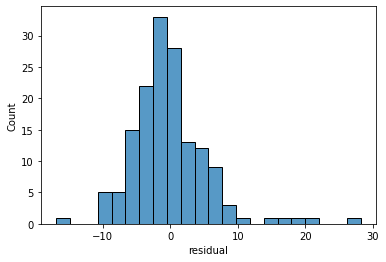

In [ ]:
sn.histplot(test_results.residual);

In [ ]:
test_results.residual.describe()

count   152.000
mean     -0.096
std       5.809
min     -16.915
25%      -3.299
50%      -0.742
75%       2.372
max      28.200
Name: residual, dtype: float64

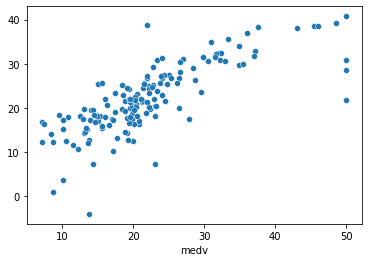

In [ ]:
sn.scatterplot(x=y_test,y=test_pred,data=test_results);

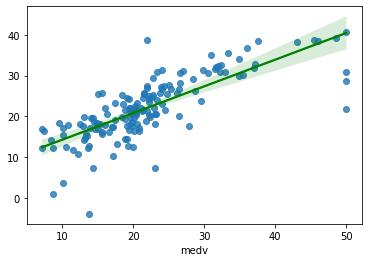

In [ ]:
sn.regplot(x=y_test,y=test_pred,data=test_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_test,test_pred).round(2)

0.59

In [ ]:
from numpy.core.fromnumeric import mean
from math import sqrt
def ERROR_METRICS(orig,pred):
    resid= orig - pred
    resid_sq= resid**2
    me= round(mean(resid),3)
    mae=round(mean(np.abs(resid)),3)
    mape=round(100*mean(np.abs(resid/orig)),3)
    rmse=round(sqrt(mean(resid_sq)),3)
    return {'ME':me, 'MAE':mae, 'MAPE':mape, 'RMSE':rmse}

In [ ]:
ERROR_METRICS(y_train,train_pred)

{'MAE': 3.202, 'MAPE': 16.381, 'ME': 0.0, 'RMSE': 4.679}

In [ ]:
ERROR_METRICS(y_test,test_pred)

{'MAE': 4.014, 'MAPE': 21.639, 'ME': -0.096, 'RMSE': 5.791}

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
100*mean_absolute_percentage_error(y_test, test_pred).round(3)

21.6

In [ ]:
################################################################
################################################################
###### Classification with Logistic Regression ############
################################################################

In [ ]:
y_clf= boston_df['cat_ medv']
X_clf= boston_df[['tax','rm','age','ptratio','dis']]

In [ ]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf,y_clf,test_size=0.3, random_state=123)

In [ ]:
log_reg = sm.Logit(y_clf_train, X_clf_train).fit()

Optimization terminated successfully.
         Current function value: 0.187065
         Iterations 9


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:              cat_ medv   No. Observations:                  354
Model:                          Logit   Df Residuals:                      349
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                  0.5889
Time:                        00:07:23   Log-Likelihood:                -66.221
converged:                       True   LL-Null:                       -161.10
Covariance Type:            nonrobust   LLR p-value:                 5.986e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
tax           -0.0121      0.004     -3.373      0.001      -0.019      -0.005
rm             2.6981      0.381      7.086      0.000       1.952       3.444
age           -0.0174      0.011     -1.615      0.1

In [ ]:
yhat = log_reg.predict(X_clf_test)
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y
print('Actual values', list(y_clf_test))
print('Predictions :', prediction)

Actual values [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Predictions : [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
 
# confusion matrix
cm = confusion_matrix(y_clf_test, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_clf_test, prediction))

Confusion Matrix : 
 [[127   1]
 [ 10  14]]
Test accuracy =  0.9276315789473685


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_clf_train, y_clf_train)

In [ ]:
clf_train_pred=clf.predict(X_clf_train)
clf_train_results=pd.DataFrame({'cat_medv':y_clf_train,
                            'clf_predicted':clf_train_pred,
                            'clf_residual':np.abs(y_clf_train - clf_train_pred)})
clf_train_results.head()

,cat_medv,clf_predicted,clf_residual
273,1,1,0
52,0,0,0
181,1,0,1
452,0,0,0
381,0,0,0


In [ ]:
clf_train_results.clf_residual.value_counts()

0    340
1     14
Name: clf_residual, dtype: int64

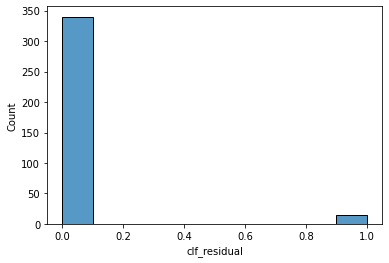

In [ ]:
sn.histplot(clf_train_results.clf_residual);

In [ ]:
from sklearn.metrics import confusion_matrix
clf_train_cm=confusion_matrix(clf_train_results['cat_medv'], clf_train_results['clf_predicted'])
clf_train_cm

array([[292,   2],
       [ 12,  48]])

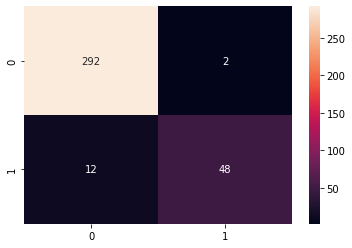

In [ ]:
sn.heatmap(clf_train_cm,annot=True, fmt='g');

In [ ]:
#accuracy_rate
clf_train_accuracy_rate = round((clf_train_cm[0,0]+clf_train_cm[1,1])/clf_train_cm.sum(),2)
clf_train_accuracy_rate

0.96

In [ ]:
(292+48)/354

0.96045197740113

In [ ]:
#error rate : 1- accuracy_rate
1- clf_train_accuracy_rate

0.040000000000000036

In [ ]:
clf_train_cm

array([[292,   2],
       [ 12,  48]])

In [ ]:
clf_train_cm[1,0]

12

In [ ]:
def CLF_ERROR_METRICS(cm):
  tp=cm[0,0]
  tn=cm[1,1]
  fn=cm[0,1]
  fp=cm[1,0]
  acc = round((tp+tn)/cm.sum(),2)
  err = round(1- acc,2)
  sensitivity= round(tp/(tp+fn),2)
  specificity= round(tn/(fp+tn),2)
  return {'TP':tp, 
          'TN':tn, 
          'FN':fn, 
          'FP':fp, 
          'ACC':acc,
          'ERR': err,
          'SENS':sensitivity,
          'SPEC':specificity}

In [ ]:
CLF_ERROR_METRICS(clf_train_cm)

{'ACC': 0.96,
 'ERR': 0.04,
 'FN': 2,
 'FP': 12,
 'SENS': 0.99,
 'SPEC': 0.8,
 'TN': 48,
 'TP': 292}

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(clf_train_results['cat_medv'], clf_train_results['clf_predicted']).round(2)

0.96

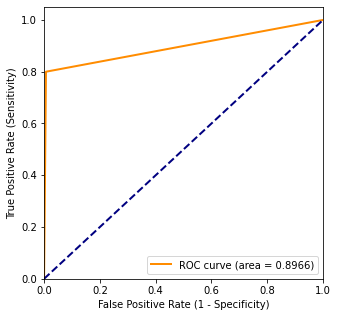

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(clf_train_results['cat_medv'], clf_train_results['clf_predicted'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [ ]:
clf_test_pred=clf.predict(X_clf_test)
clf_test_results=pd.DataFrame({'cat_medv':y_clf_test,
                            'clf_predicted':clf_test_pred,
                            'clf_residual':np.abs(y_clf_test - clf_test_pred)})
clf_test_results.head()

,cat_medv,clf_predicted,clf_residual
410,0,0,0
85,0,0,0
280,1,1,0
422,0,0,0
199,1,0,1


In [ ]:
clf_test_results.clf_residual.value_counts()

0    141
1     11
Name: clf_residual, dtype: int64

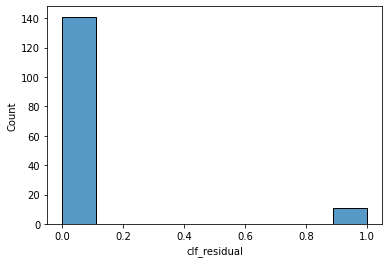

In [ ]:
sn.histplot(clf_test_results.clf_residual);

In [ ]:
from sklearn.metrics import confusion_matrix
clf_test_cm=confusion_matrix(clf_test_results['cat_medv'], clf_test_results['clf_predicted'])
clf_test_cm

array([[127,   1],
       [ 10,  14]])

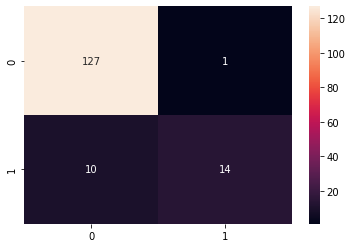

In [ ]:
sn.heatmap(clf_test_cm,annot=True, fmt='g');

In [ ]:
#accuracy_rate
clf_test_accuracy_rate = round((clf_test_cm[0,0]+clf_test_cm[1,1])/clf_test_cm.sum(),2)
clf_test_accuracy_rate

0.93

In [ ]:
CLF_ERROR_METRICS(clf_test_cm)

{'ACC': 0.93,
 'ERR': 0.07,
 'FN': 1,
 'FP': 10,
 'SENS': 0.99,
 'SPEC': 0.58,
 'TN': 14,
 'TP': 127}

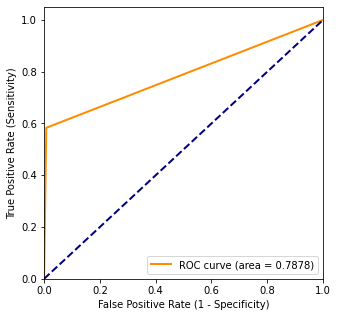

In [ ]:
fpr, tpr, _ = roc_curve(clf_test_results['cat_medv'], clf_test_results['clf_predicted'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [ ]:
################################################################
################################################################
################################################################
################################################################
#https://ostwalprasad.github.io/machine-learning/PCA-using-python.html
from sklearn.decomposition import PCA

In [ ]:
df_pca=boston_df.drop(['medv','rm_cat','cat_ medv'],axis=1)

In [ ]:
df_pca

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.063,0.000,11.930,0,0.573,6.593,69.100,2.479,1,273,21.000,9.670
502,0.045,0.000,11.930,0,0.573,6.120,76.700,2.288,1,273,21.000,9.080
503,0.061,0.000,11.930,0,0.573,6.976,91.000,2.167,1,273,21.000,5.640
504,0.110,0.000,11.930,0,0.573,6.794,89.300,2.389,1,273,21.000,6.480


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
boston_df_pca = StandardScaler().fit_transform(df_pca)
boston_df_pca = pd.DataFrame(boston_df_pca, columns= df_pca.columns)
boston_df_pca.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.420,-0.488,-1.558,-0.273,-1.466,-3.880,-2.335,-1.267,-0.983,-1.314,-2.707,-1.531
25%,-0.411,-0.488,-0.868,-0.273,-0.913,-0.569,-0.837,-0.806,-0.638,-0.768,-0.488,-0.799
50%,-0.391,-0.488,-0.211,-0.273,-0.144,-0.108,0.317,-0.279,-0.523,-0.465,0.275,-0.181
75%,0.007,0.049,1.016,-0.273,0.599,0.483,0.907,0.662,1.661,1.531,0.807,0.603
max,9.934,3.804,2.423,3.668,2.732,3.555,1.117,3.961,1.661,1.798,1.639,3.549


In [ ]:
pcamodel = PCA(n_components=5)
pca = pcamodel.fit_transform(boston_df_pca)
pca.shape

(506, 5)

In [ ]:
print(np.round(pcamodel.explained_variance_ratio_,3))

[0.492 0.117 0.098 0.071 0.067]


In [ ]:
np.cumsum(np.round(pcamodel.explained_variance_ratio_,3))

array([0.492, 0.609, 0.707, 0.778, 0.845])

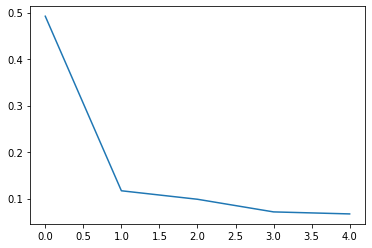

In [ ]:
plt.plot(pcamodel.explained_variance_ratio_);

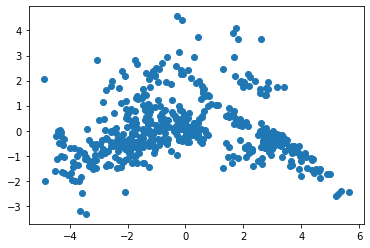

In [ ]:
plt.scatter(pca[:, 0], pca[:, 1]);

In [ ]:
pcamodel.n_components

5

In [ ]:
str(boston_df_pca.columns)

"Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',\n       'ptratio', 'lstat'],\n      dtype='object')"

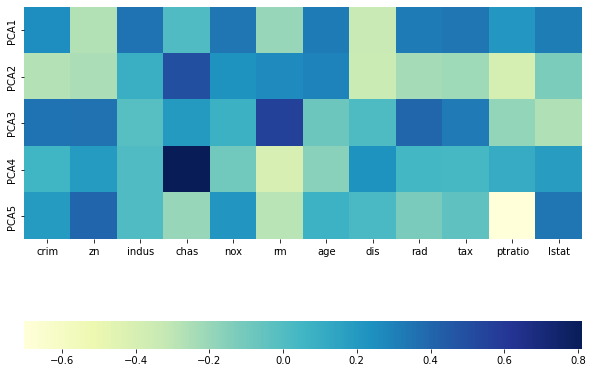

In [ ]:
plt.figure(figsize=[10,10])
ax = sn.heatmap(pcamodel.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(boston_df_pca.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [ ]:
pcamodel.components_[0:2, :]

array([[ 0.25129623, -0.26638173,  0.35487308,  0.00758852,  0.3499485 ,
        -0.19643927,  0.32317701, -0.33088249,  0.32224996,  0.34225566,
         0.21094209,  0.31533952],
       [-0.27355692, -0.25012639,  0.09314825,  0.50285462,  0.23250734,
         0.27304276,  0.2929756 , -0.34262077, -0.23092958, -0.2130427 ,
        -0.39255695, -0.12810818]])

In [ ]:
#####################################################
#####################################################
##################### KNN Regression ################
#####################################################
#####################################################

In [ ]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_ medv,rm_cat
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000,0,7.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600,0,6.000
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700,1,7.000
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940,33.400,1,7.000
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330,36.200,1,7.000


In [ ]:
y= boston_df.medv
X= boston_df[['tax','rm','age','ptratio','dis','lstat','chas','crim']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
train_pred=knn_reg.predict(X_train)
train_results=pd.DataFrame({'medv':y_train,
                            'predicted':train_pred,
                            'residual':y_train - train_pred})
train_results.head()

,medv,predicted,residual
273,35.200,30.300,4.900
52,25.000,25.433,-0.433
181,36.200,42.000,-5.800
452,16.100,15.400,0.700
381,10.900,18.533,-7.633


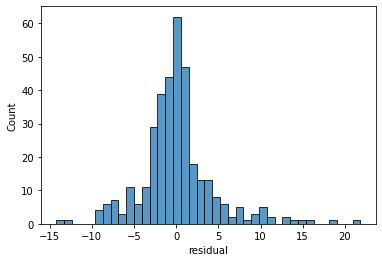

In [ ]:
sn.histplot(train_results.residual);

In [ ]:
train_results.residual.describe()

count   354.000
mean      0.096
std       4.338
min     -14.233
25%      -1.967
50%      -0.067
75%       1.325
max      21.833
Name: residual, dtype: float64

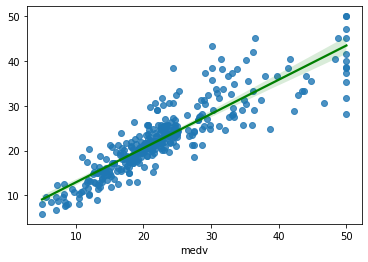

In [ ]:
sn.regplot(x=y_train,y=train_pred,data=train_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_train,train_pred).round(2)

0.78

In [ ]:
test_pred=knn_reg.predict(X_test)
test_results=pd.DataFrame({'medv':y_test,
                            'predicted':test_pred,
                            'residual':y_test - test_pred})
test_results.head()

,medv,predicted,residual
410,15.000,6.167,8.833
85,26.600,26.933,-0.333
280,45.400,31.533,13.867
422,20.800,16.567,4.233
199,34.900,26.367,8.533


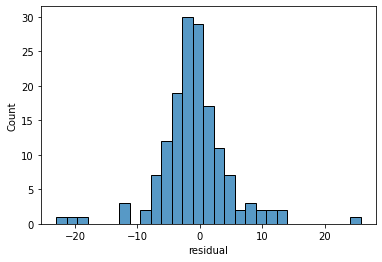

In [ ]:
sn.histplot(test_results.residual);

In [ ]:
test_results.residual.describe()

count   152.000
mean     -0.935
std       5.658
min     -23.000
25%      -3.383
50%      -1.133
75%       1.175
max      25.767
Name: residual, dtype: float64

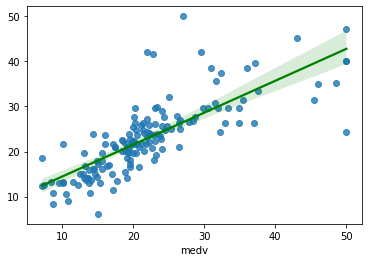

In [ ]:
sn.regplot(x=y_test,y=test_pred,data=test_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_test,test_pred).round(2)

0.6

In [ ]:
from numpy.core.fromnumeric import mean
from math import sqrt
def ERROR_METRICS(orig,pred):
    resid= orig - pred
    resid_sq= resid**2
    me= round(mean(resid),3)
    mae=round(mean(np.abs(resid)),3)
    mape=round(100*mean(np.abs(resid/orig)),3)
    rmse=round(sqrt(mean(resid_sq)),3)
    return {'ME':me, 'MAE':mae, 'MAPE':mape, 'RMSE':rmse}

In [ ]:
ERROR_METRICS(y_train,train_pred)

{'MAE': 2.874, 'MAPE': 12.647, 'ME': 0.096, 'RMSE': 4.333}

In [ ]:
ERROR_METRICS(y_test,test_pred)

{'MAE': 3.856, 'MAPE': 19.033, 'ME': -0.935, 'RMSE': 5.717}

In [ ]:
########### KNN: Elbow method

In [ ]:
error_rmse = []
k_range=range(1,11)
for i in k_range: 
  knn_reg_elb = KNeighborsRegressor(n_neighbors=i)
  knn_reg_elb.fit(X_train, y_train)
  resid_sq_i = (y_test - knn_reg_elb.predict(X_test))**2
  rmse_i=round(sqrt(mean(resid_sq_i)),4)
  error_rmse.append(rmse_i)

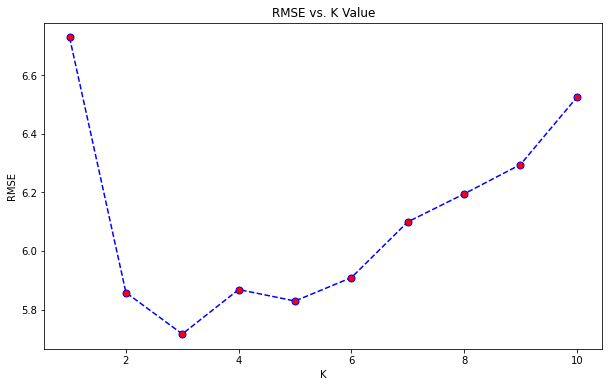

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(k_range,error_rmse,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=7)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('RMSE');

In [ ]:
pd.DataFrame([k_range,error_rmse])

,0,1,2,3,4,5,6,7,8,9
0,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000
1,6.728,5.858,5.717,5.868,5.829,5.909,6.099,6.194,6.295,6.524


In [ ]:
#####################################################
#####################################################
##################### Decision Tree  ################
#####################################################
#####################################################

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [ ]:
y= boston_df.medv
X= boston_df[['tax','rm','age','ptratio','dis','lstat','chas','crim']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

reg_tree=DecisionTreeRegressor(random_state=123, max_depth=4, min_samples_split=20, min_samples_leaf=20)

In [ ]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20, min_samples_split=20,
                      random_state=123)

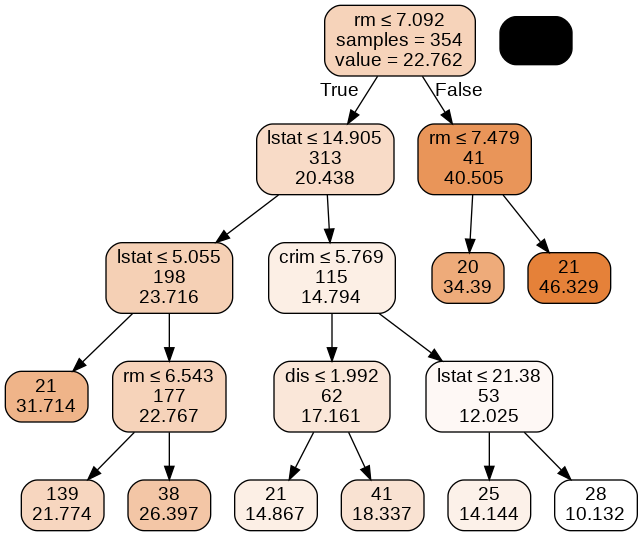

In [ ]:
plotDecisionTree(reg_tree,feature_names=X_train.columns)

In [ ]:
train_pred=reg_tree.predict(X_train)
train_results=pd.DataFrame({'medv':y_train,
                            'predicted':train_pred,
                            'residual':y_train - train_pred})
train_results.head()

,medv,predicted,residual
273,35.200,46.329,-11.129
52,25.000,21.774,3.226
181,36.200,21.774,14.426
452,16.100,18.337,-2.237
381,10.900,14.144,-3.244


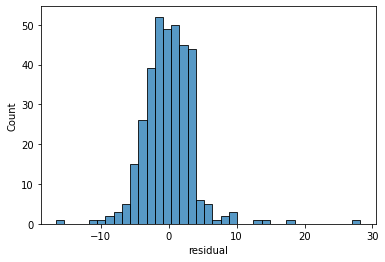

In [ ]:
sn.histplot(train_results.residual);

In [ ]:
train_results.residual.describe()

count   354.000
mean      0.000
std       3.855
min     -16.590
25%      -2.265
50%      -0.005
75%       2.122
max      28.226
Name: residual, dtype: float64

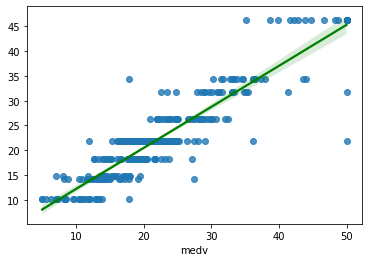

In [ ]:
sn.regplot(x=y_train,y=train_pred,data=train_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_train,train_pred).round(2)

0.83

In [ ]:
test_pred=reg_tree.predict(X_test)
test_results=pd.DataFrame({'medv':y_test,
                            'predicted':test_pred,
                            'residual':y_test - test_pred})
test_results.head()

,medv,predicted,residual
410,15.000,21.774,-6.774
85,26.600,26.397,0.203
280,45.400,46.329,-0.929
422,20.800,21.774,-0.974
199,34.900,31.714,3.186


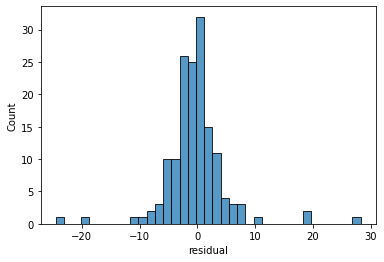

In [ ]:
sn.histplot(test_results.residual);

In [ ]:
test_results.residual.describe()

count   152.000
mean     -0.441
std       5.206
min     -24.429
25%      -2.531
50%      -0.374
75%       1.273
max      28.226
Name: residual, dtype: float64

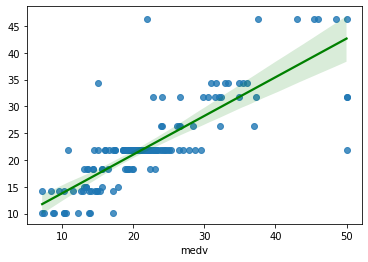

In [ ]:
sn.regplot(x=y_test,y=test_pred,data=test_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_test,test_pred).round(2)

0.66

In [ ]:
ERROR_METRICS(y_train,train_pred)

{'MAE': 2.709, 'MAPE': 13.868, 'ME': 0.0, 'RMSE': 3.849}

In [ ]:
ERROR_METRICS(y_test,test_pred)

{'MAE': 3.181, 'MAPE': 16.168, 'ME': -0.441, 'RMSE': 5.208}

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg_tree,X_train,y_train,cv=10)

array([0.62251102, 0.67065874, 0.80722387, 0.55613906, 0.90169836,
       0.76581156, 0.79027967, 0.64040584, 0.42625043, 0.772848  ])

In [ ]:
cross_val_score(reg_tree,X_train,y_train,cv=5).mean()

0.7042218602919951

In [ ]:
cross_val_score(reg_tree,X_test,y_test,cv=10)

array([0.62928122, 0.20979134, 0.62272972, 0.79513732, 0.26732536,
       0.69334308, 0.52569272, 0.39999848, 0.53375288, 0.66440545])

In [ ]:
###############################################
#grid search approach for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# user grid search to find optimized tree
param_grid = {
    'max_depth': [2,3,5,7,10, 15, 20], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
    'min_samples_leaf': [5, 10, 15],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [ ]:
param_grid = {
    'max_depth': [3,4,5,6], 
    'min_impurity_decrease': [0.005, 0.001,0.0015], 
    'min_samples_split': [8,10,12], 
    'min_samples_leaf': [4,5,6],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 6, 'min_samples_split': 12}


In [ ]:
final_reg_tree=DecisionTreeRegressor(random_state=123,max_depth=5,min_samples_split=8,min_samples_leaf=6,min_impurity_decrease=0.005)

In [ ]:
final_reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.005,
                      min_samples_leaf=6, min_samples_split=8,
                      random_state=123)

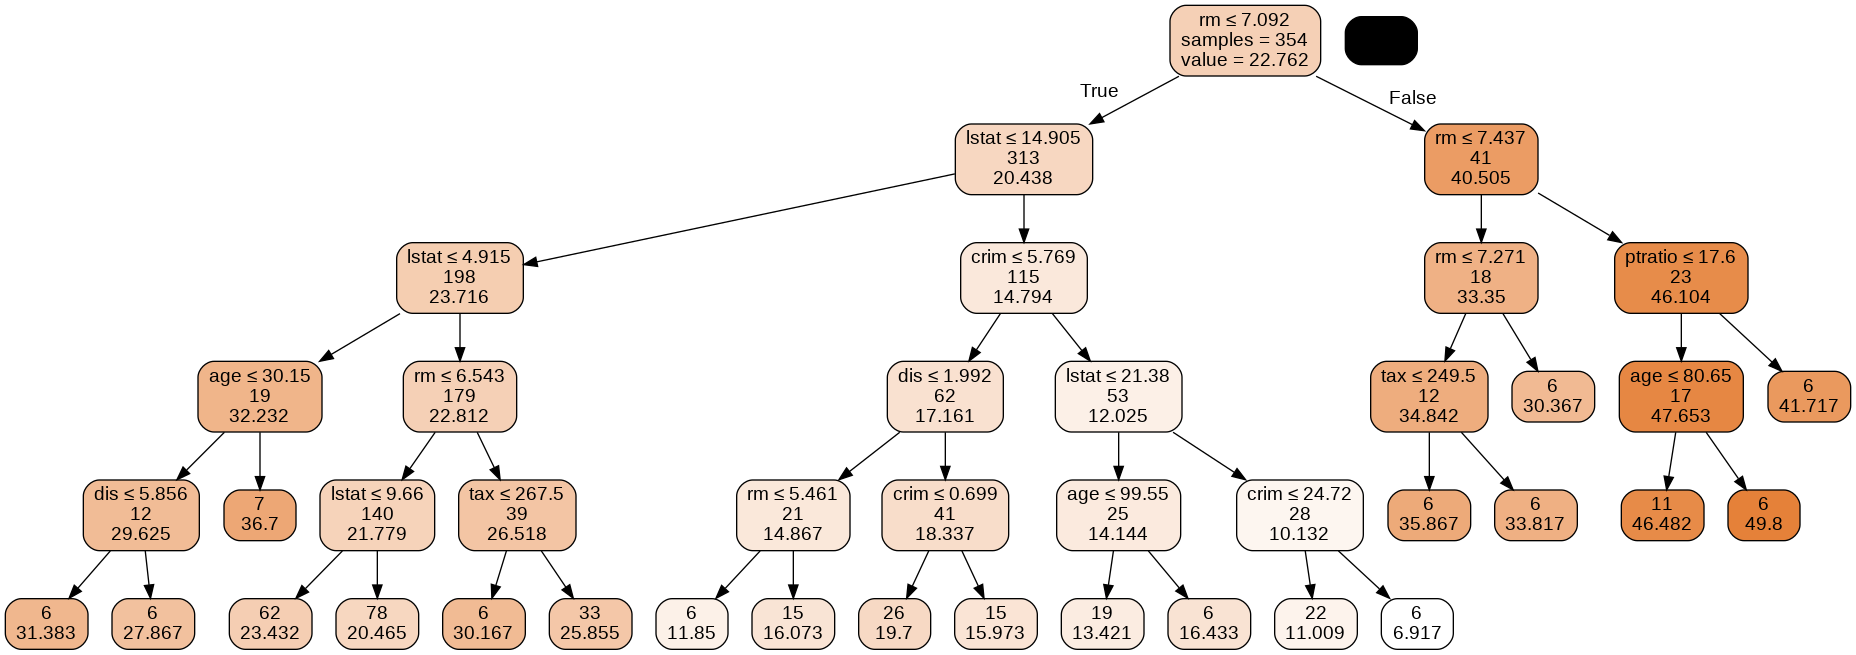

In [ ]:
plotDecisionTree(final_reg_tree,feature_names=X_train.columns)

In [ ]:
final_train_pred=final_reg_tree.predict(X_train)
final_test_pred=final_reg_tree.predict(X_test)

In [ ]:
ERROR_METRICS(y_train,final_train_pred)

{'MAE': 2.224, 'MAPE': 11.355, 'ME': -0.0, 'RMSE': 3.24}

In [ ]:
ERROR_METRICS(y_test,final_test_pred)

{'MAE': 3.077, 'MAPE': 15.422, 'ME': -0.281, 'RMSE': 4.843}

In [ ]:
final_reg_tree.feature_importances_

array([0.00401514, 0.64094614, 0.01145978, 0.00586378, 0.00766582,
       0.29384059, 0.        , 0.03620877])

In [ ]:
final_reg_tree.feature_names_in_

array(['tax', 'rm', 'age', 'ptratio', 'dis', 'lstat', 'chas', 'crim'],
      dtype=object)

In [ ]:
##################################
# Classification Tree

In [ ]:
riding_mowers = pd.read_csv('/content/drive/MyDrive/NEU IE 7275 Colab Notebooks/RidingMowers.csv')

In [ ]:
riding_mowers

,Income,Lot_Size,Ownership
0,60.000,18.400,Owner
1,85.500,16.800,Owner
2,64.800,21.600,Owner
3,61.500,20.800,Owner
4,87.000,23.600,Owner
5,110.100,19.200,Owner
6,108.000,17.600,Owner
7,82.800,22.400,Owner
8,69.000,20.000,Owner
9,93.000,20.800,Owner


In [ ]:
y= riding_mowers.Ownership
X= riding_mowers[['Income','Lot_Size']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [ ]:
clf_tree=DecisionTreeClassifier(random_state=123, max_depth=2)

In [ ]:
clf_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=123)

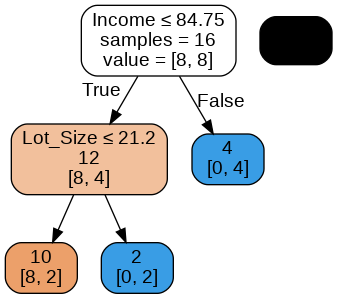

In [ ]:
plotDecisionTree(clf_tree,feature_names=X_train.columns)

In [ ]:
clf_train_pred=clf_tree.predict(X_train)


In [ ]:
clf_train_results=pd.DataFrame({'Ownership':y_train,
                                'clf_predicted':clf_train_pred})
clf_train_results.head()

,Ownership,clf_predicted
4,Owner,Owner
3,Owner,Nonowner
23,Nonowner,Nonowner
12,Nonowner,Nonowner
16,Nonowner,Nonowner


In [ ]:
clf_test_pred=clf_tree.predict(X_test)

clf_test_results=pd.DataFrame({'Ownership':y_test,
                                'clf_predicted':clf_test_pred})
clf_test_results.head()

,Ownership,clf_predicted
5,Owner,Owner
20,Nonowner,Nonowner
21,Nonowner,Nonowner
18,Nonowner,Nonowner
15,Nonowner,Nonowner


In [ ]:
clf_train_cm=confusion_matrix(clf_train_results['Ownership'], clf_train_results['clf_predicted'])
clf_train_cm

array([[8, 0],
       [2, 6]])

In [ ]:
clf_test_cm=confusion_matrix(clf_test_results['Ownership'], clf_test_results['clf_predicted'])
clf_test_cm

array([[4, 0],
       [2, 2]])

In [ ]:
CLF_ERROR_METRICS(clf_train_cm)

{'ACC': 0.88,
 'ERR': 0.12,
 'FN': 0,
 'FP': 2,
 'SENS': 1.0,
 'SPEC': 0.75,
 'TN': 6,
 'TP': 8}

In [ ]:
CLF_ERROR_METRICS(clf_test_cm)

{'ACC': 0.75,
 'ERR': 0.25,
 'FN': 0,
 'FP': 2,
 'SENS': 1.0,
 'SPEC': 0.5,
 'TN': 2,
 'TP': 4}

Feature: 0, Score: 0.55556
Feature: 1, Score: 0.44444


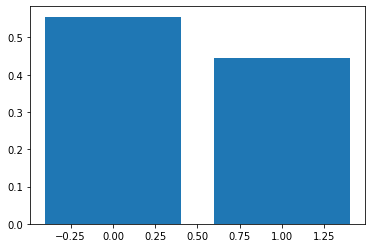

In [ ]:
import matplotlib.pyplot as plt

importance = clf_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#####################################################
#####################################################
########## Random Forest  Regression ################
#####################################################
#####################################################

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor

In [ ]:
y= boston_df.medv
X= boston_df[['tax','rm','age','ptratio','dis','lstat','chas','crim']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [ ]:
###############################################
#grid search approach for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# user grid search to find optimized tree
param_grid = {
    'n_estimators': [100],
    'max_depth': [2,5], 
    'min_impurity_decrease': [0, 0.01], 
    'min_samples_split': [10, 20], 
    'min_samples_leaf': [10, 15],
    'max_features':['sqrt']
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100,max_features=4,max_depth=3,random_state=123)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features=4, random_state=123)

In [ ]:
rf_reg_train_pred=rf_reg.predict(X_train)
rf_reg_train_results=pd.DataFrame({'medv':y_train,
                            'predicted':rf_reg_train_pred,
                            'residual':y_train - rf_reg_train_pred})
rf_reg_train_results.head()

,medv,predicted,residual
273,35.200,38.068,-2.868
52,25.000,25.247,-0.247
181,36.200,23.646,12.554
452,16.100,16.808,-0.708
381,10.900,13.085,-2.185


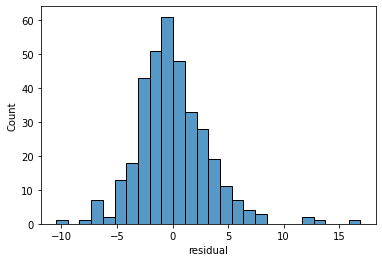

In [ ]:
sn.histplot(rf_reg_train_results.residual);

In [ ]:
rf_reg_train_results.residual.describe()

count   354.000
mean      0.016
std       3.251
min     -10.491
25%      -1.924
50%      -0.280
75%       1.830
max      16.925
Name: residual, dtype: float64

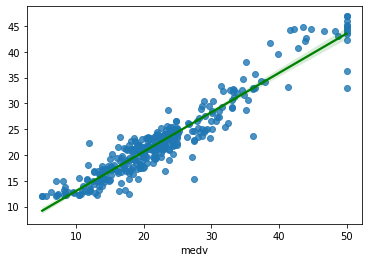

In [ ]:
sn.regplot(x=y_train,y=rf_reg_train_pred,data=rf_reg_train_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_train,rf_reg_train_pred).round(2)

0.88

In [ ]:
rf_reg_test_pred=rf_reg.predict(X_test)
rf_reg_test_results=pd.DataFrame({'medv':y_test,
                            'predicted':rf_reg_test_pred,
                            'residual':y_test - rf_reg_test_pred})
rf_reg_test_results.head()

,medv,predicted,residual
410,15.000,22.676,-7.676
85,26.600,25.364,1.236
280,45.400,44.050,1.350
422,20.800,17.671,3.129
199,34.900,30.077,4.823


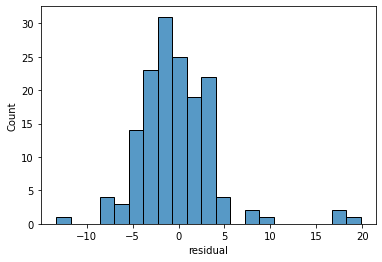

In [ ]:
sn.histplot(rf_reg_test_results.residual);

In [ ]:
rf_reg_test_results.residual.describe()

count   152.000
mean     -0.261
std       4.207
min     -13.333
25%      -2.449
50%      -0.706
75%       1.922
max      19.827
Name: residual, dtype: float64

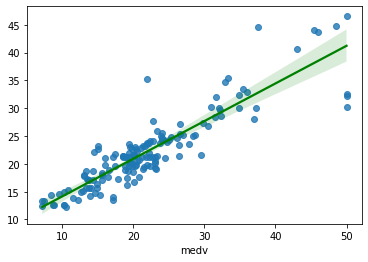

In [ ]:
sn.regplot(x=y_test,y=rf_reg_test_pred,data=rf_reg_test_results, line_kws={'color': 'g'});

In [ ]:
r2_score(y_test,rf_reg_test_pred).round(2)

0.78

In [ ]:
ERROR_METRICS(y_train,rf_reg_train_pred)

{'MAE': 2.401, 'MAPE': 13.383, 'ME': 0.016, 'RMSE': 3.247}

In [ ]:
ERROR_METRICS(y_test,rf_reg_test_pred)

{'MAE': 2.957, 'MAPE': 15.656, 'ME': -0.261, 'RMSE': 4.201}

In [ ]:
#####################################################
#####################################################
########## Random Forest Classification #############
#####################################################
#####################################################

In [ ]:
universal_bank = pd.read_csv('/content/drive/MyDrive/NEU IE 7275 Colab Notebooks/UniversalBank.csv')

In [ ]:
universal_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


In [ ]:
universal_bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
bank_df = universal_bank.drop(columns=['ID', 'ZIP Code'])

# Treat education as categorical, convert to dummy variables
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df.Education.cat.rename_categories(new_categories, inplace=True)
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
rf_train_pred=rf.predict(X_train)
rf_train_results=pd.DataFrame({'Personal Loan':y_train,'clf_predicted':rf_train_pred})
rf_train_results.head(20)

,Personal Loan,clf_predicted
1334,0,0
4768,0,0
65,0,0
177,0,0
4489,0,0
3889,0,0
1922,0,0
26,0,0
2458,0,0
525,0,0


In [ ]:
clf_train_cm=confusion_matrix(y_train, rf_train_pred)
clf_train_cm

array([[3169,    0],
       [   0,  331]])

In [ ]:
CLF_ERROR_METRICS(clf_train_cm)

{'ACC': 1.0,
 'ERR': 0.0,
 'FN': 0,
 'FP': 0,
 'SENS': 1.0,
 'SPEC': 1.0,
 'TN': 331,
 'TP': 3169}

In [ ]:
rf_test_pred=rf.predict(X_test)
rf_test_results=pd.DataFrame({'Personal Loan':y_test,'clf_predicted':rf_test_pred})
rf_test_results.head()

,Personal Loan,clf_predicted
2764,0,0
4767,0,0
3814,0,0
3499,0,0
2735,0,0


In [ ]:
clf_test_cm=confusion_matrix(y_test, rf_test_pred)
clf_test_cm

array([[1348,    3],
       [  23,  126]])

In [ ]:
CLF_ERROR_METRICS(clf_test_cm)

{'ACC': 0.98,
 'ERR': 0.02,
 'FN': 3,
 'FP': 23,
 'SENS': 1.0,
 'SPEC': 0.85,
 'TN': 126,
 'TP': 1348}

                            feature  importance   std
6                Securities Account       0.005 0.006
8                            Online       0.008 0.006
9                        CreditCard       0.009 0.006
5                          Mortgage       0.037 0.023
0                               Age       0.038 0.015
1                        Experience       0.039 0.018
7                        CD Account       0.057 0.036
10               Education_Graduate       0.095 0.050
11  Education_Advanced/Professional       0.103 0.046
3                            Family       0.128 0.058
4                             CCAvg       0.158 0.084
2                            Income       0.326 0.092


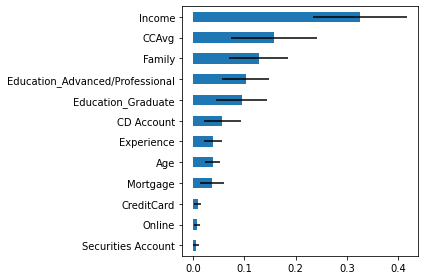

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
#####################################################
#####################################################
########## Logistic Regression 2        #############
#####################################################
#####################################################

In [ ]:
universal_bank = pd.read_csv('/content/drive/MyDrive/NEU IE 7275 Colab Notebooks/UniversalBank.csv')

In [ ]:
universal_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000,2,0,0,0,0,0,1


In [ ]:
universal_bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
bank_df = universal_bank.drop(columns=['ID', 'ZIP Code'])

# Treat education as categorical, convert to dummy variables
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df.Education.cat.rename_categories(new_categories, inplace=True)
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#using statsmodels package to print model details
log_reg2 = sm.Logit(y_train, X_train).fit()

print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.118665
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Wed, 20 Apr 2022   Pseudo R-squ.:                  0.6209
Time:                        00:08:25   Log-Likelihood:                -415.33
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                4.488e-285
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                -0.4926      0.027    -18.555  

In [ ]:
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
#the sklearn function
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear',random_state=123)
logit_reg.fit(X_train, y_train)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(y_test, logit_reg.predict(X_test), df = len(X_train.columns) + 1))

intercept  -12.577360479182577
         Age  Experience  Income  Family  CCAvg  Mortgage  Securities Account  \
coeff -0.028       0.033   0.059   0.648  0.211     0.001              -1.152   

       CD Account  Online  CreditCard  Education_Graduate  \
coeff       3.816  -0.660      -1.059               3.900   

       Education_Advanced/Professional  
coeff                            4.044  

AIC -470.31289143413596


In [ ]:
train_pred=logit_reg.predict(X_train)
train_pred_prob=logit_reg.predict_proba(X_train)
train_results=pd.DataFrame({'Personal Loan':y_train,
                            'predicted':train_pred,
                            'residual':np.abs(y_train - train_pred),
                            'p(0)': [p[0] for p in train_pred_prob],
                            'p(1)': [p[1] for p in train_pred_prob]})
train_results.tail(25)

,Personal Loan,predicted,residual,p(0),p(1)
1031,0,0,0,0.999,0.001
1110,0,0,0,1.000,0.000
1888,0,0,0,0.960,0.040
3550,0,0,0,0.999,0.001
1527,0,0,0,0.994,0.006
753,0,0,0,0.999,0.001
3049,0,0,0,0.974,0.026
2628,0,0,0,0.974,0.026
562,0,0,0,0.995,0.005
4764,0,0,0,0.949,0.051


In [ ]:
from sklearn.metrics import confusion_matrix
train_cm=confusion_matrix(train_results['Personal Loan'], train_results['predicted'])
train_cm

array([[3132,   37],
       [ 112,  219]])

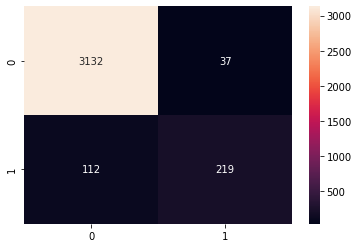

In [ ]:
sn.heatmap(train_cm,annot=True, fmt='g');

In [ ]:
accuracy_score(train_results['Personal Loan'], train_results['predicted'])

0.9574285714285714

In [ ]:
CLF_ERROR_METRICS(train_cm)

{'ACC': 0.96,
 'ERR': 0.04,
 'FN': 37,
 'FP': 112,
 'SENS': 0.99,
 'SPEC': 0.66,
 'TN': 219,
 'TP': 3132}

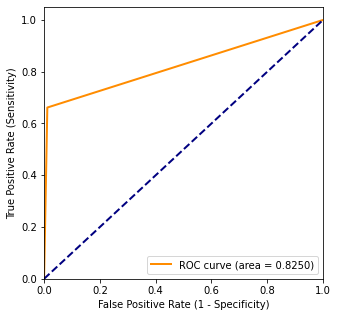

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(train_results['Personal Loan'], train_results['predicted'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [ ]:
test_pred=logit_reg.predict(X_test)
test_pred_prob=logit_reg.predict_proba(X_test)
test_results=pd.DataFrame({'Personal Loan':y_test,
                            'predicted':test_pred,
                            'residual':np.abs(y_test - test_pred),
                            'p(0)': [p[0] for p in test_pred_prob],
                            'p(1)': [p[1] for p in test_pred_prob]})
test_results.head()

,Personal Loan,predicted,residual,p(0),p(1)
2764,0,0,0,0.982,0.018
4767,0,0,0,1.000,0.000
3814,0,0,0,1.000,0.000
3499,0,0,0,0.998,0.002
2735,0,0,0,0.960,0.040


In [ ]:
test_cm=confusion_matrix(test_results['Personal Loan'], test_results['predicted'])
test_cm

array([[1339,   12],
       [  51,   98]])

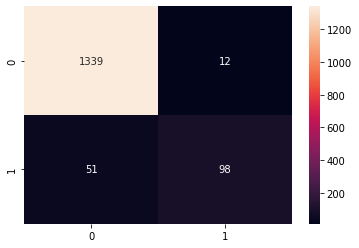

In [ ]:
sn.heatmap(test_cm,annot=True, fmt='g');

In [ ]:
accuracy_score(test_results['Personal Loan'], test_results['predicted'])

0.958

In [ ]:
CLF_ERROR_METRICS(test_cm)

{'ACC': 0.96,
 'ERR': 0.04,
 'FN': 12,
 'FP': 51,
 'SENS': 0.99,
 'SPEC': 0.66,
 'TN': 98,
 'TP': 1339}

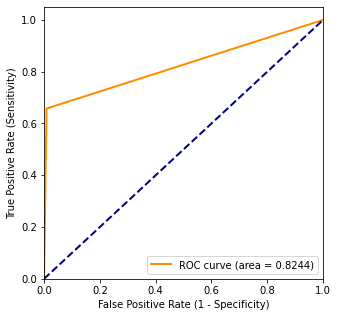

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_results['Personal Loan'], test_results['predicted'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

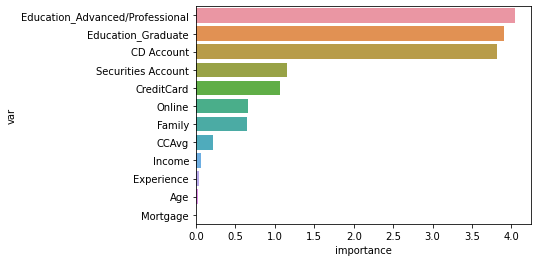

In [ ]:
#These coefficients can provide the basis for a crude feature importance score. 
#This assumes that the input variables have the same scale or have been scaled/normalized prior to fitting a model.
from seaborn.categorical import barplot
feature_importance=pd.DataFrame({'importance':[abs(i) for i in logit_reg.coef_[0]],'var':X.columns}).sort_values('importance',ascending=False)
barplot(y='var',x='importance',data=feature_importance,orient='h');

In [ ]:
#####################################################
#####################################################
################## MLP Classifier    ################
#####################################################
#####################################################

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [ ]:
bank_df

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.600,0,0,1,0,0,0,0,0
1,45,19,34,3,1.500,0,0,1,0,0,0,0,0
2,39,15,11,1,1.000,0,0,0,0,0,0,0,0
3,35,9,100,1,2.700,0,0,0,0,0,0,1,0
4,35,8,45,4,1.000,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.900,0,0,0,0,1,0,0,1
4996,30,4,15,4,0.400,85,0,0,0,1,0,0,0
4997,63,39,24,2,0.300,0,0,0,0,0,0,0,1
4998,65,40,49,3,0.500,0,0,0,0,1,0,1,0


In [ ]:
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

mlp_clf = MLPClassifier(hidden_layer_sizes=(10,5), 
                        #alpha=0.2,
                        activation='logistic',
                        max_iter=500, 
                        random_state=123)

mlp_clf.fit(X_train, y_train)
mlp_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Network structure
print('Intercepts')
print(mlp_clf.intercepts_)

Intercepts
[array([ 0.08473591, -0.54836907,  0.06410818,  0.04476742,  0.30835868,
        0.25332865, -0.04143874, -0.07554284,  1.23538378, -1.05143482]), array([ 0.16007733, -0.20633226, -0.16999238,  0.15271915, -0.11644253]), array([-0.05965749])]


In [ ]:
print('Weights')
print(mlp_clf.coefs_)

Weights
[array([[-1.93678704e-02, -3.86656356e-01,  1.20745015e-02,
         5.91523263e-02,  1.88194282e-01, -1.65317780e-02,
         1.60699035e-01,  1.13554548e-02,  3.15561066e-01,
        -3.17292218e-01],
       [-2.01952477e-01, -6.71038099e-03,  1.18174404e-01,
        -2.34243831e-01, -1.41695170e-02,  5.46981724e-01,
        -1.69124721e-01, -2.66977060e-01, -2.94555382e-01,
         4.19709826e-01],
       [-5.20076813e-02,  2.29220320e-01,  2.34129519e-01,
         1.11300178e-01,  1.86044499e-01, -3.21486050e-02,
         1.21526610e-03, -2.45189440e-01, -9.64900824e-02,
         5.09981461e-02],
       [-3.83560348e-01, -4.58686799e-01,  9.96369213e-02,
        -5.98099014e-02,  2.18979216e-02, -4.45080720e-02,
        -1.74160469e+00,  9.08282951e-02,  4.84871738e-01,
         6.07355749e-01],
       [-4.53958874e-02,  9.06313581e-01,  7.40843859e-03,
         1.10682256e-02,  1.87934558e-01, -3.59136434e-01,
         8.28326630e-02,  1.27318661e-01, -8.50095939e-01,
  

In [ ]:
mlp_train_pred=mlp_clf.predict(X_train)
mlp_train_pred_prob=mlp_clf.predict_proba(X_train)
mlp_train_results=pd.DataFrame({'Personal Loan':y_train,
                            'predicted':mlp_train_pred,
                            'residual':np.abs(y_train - mlp_train_pred),
                            'p(0)': [p[0] for p in train_pred_prob],
                            'p(1)': [p[1] for p in train_pred_prob]})
mlp_train_results.tail(20)

,Personal Loan,predicted,residual,p(0),p(1)
4997,0,0,0,0.999,0.001
39,0,0,0,0.974,0.026
2050,0,0,0,0.974,0.026
4547,0,0,0,0.995,0.005
1847,0,0,0,0.949,0.051
1092,0,0,0,0.006,0.994
3325,0,0,0,1.000,0.000
2894,0,0,0,0.915,0.085
1363,0,0,0,0.950,0.050
3481,0,0,0,0.999,0.001


In [ ]:
mlp_train_cm=confusion_matrix(mlp_train_results['Personal Loan'], mlp_train_results['predicted'])
mlp_train_cm

array([[3144,   22],
       [  34,  300]])

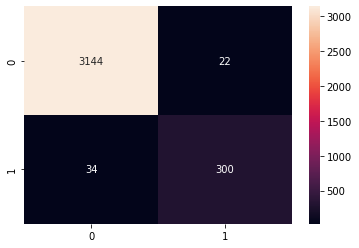

In [ ]:
sn.heatmap(mlp_train_cm,annot=True, fmt='g');

In [ ]:
accuracy_score(mlp_train_results['Personal Loan'], mlp_train_results['predicted']).round(3)

0.984

In [ ]:
CLF_ERROR_METRICS(mlp_train_cm)

{'ACC': 0.98,
 'ERR': 0.02,
 'FN': 22,
 'FP': 34,
 'SENS': 0.99,
 'SPEC': 0.9,
 'TN': 300,
 'TP': 3144}

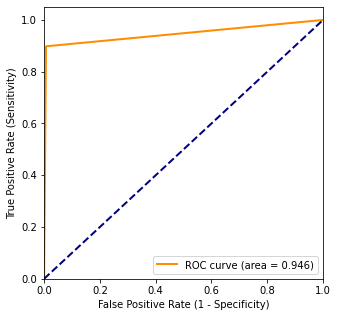

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(mlp_train_results['Personal Loan'], mlp_train_results['predicted'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [ ]:
mlp_test_pred=mlp_clf.predict(X_test)
mlp_test_pred_prob=mlp_clf.predict_proba(X_test)
mlp_test_results=pd.DataFrame({'Personal Loan':y_test,
                            'predicted':mlp_test_pred,
                            'residual':np.abs(y_test - mlp_test_pred),
                            'p(0)': [p[0] for p in test_pred_prob],
                            'p(1)': [p[1] for p in test_pred_prob]})
mlp_test_results.tail(20)


,Personal Loan,predicted,residual,p(0),p(1)
809,0,0,0,0.990,0.010
1208,0,0,0,0.717,0.283
4469,0,0,0,1.000,0.000
3389,0,0,0,0.980,0.020
4434,0,0,0,0.084,0.916
483,0,0,0,0.994,0.006
2279,0,0,0,0.012,0.988
4441,0,0,0,0.999,0.001
1063,0,0,0,1.000,0.000
3006,1,1,0,0.997,0.003


In [ ]:
mlp_test_cm=confusion_matrix(mlp_test_results['Personal Loan'], mlp_test_results['predicted'])
mlp_test_cm

array([[1338,   16],
       [  20,  126]])

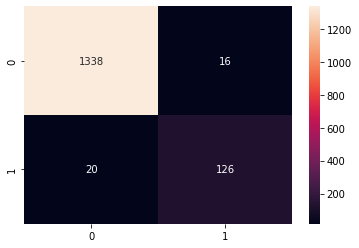

In [ ]:
sn.heatmap(mlp_test_cm,annot=True, fmt='g');

In [ ]:
accuracy_score(mlp_test_results['Personal Loan'], mlp_test_results['predicted']).round(3)

0.976

In [ ]:
CLF_ERROR_METRICS(mlp_test_cm)

{'ACC': 0.98,
 'ERR': 0.02,
 'FN': 16,
 'FP': 20,
 'SENS': 0.99,
 'SPEC': 0.86,
 'TN': 126,
 'TP': 1338}

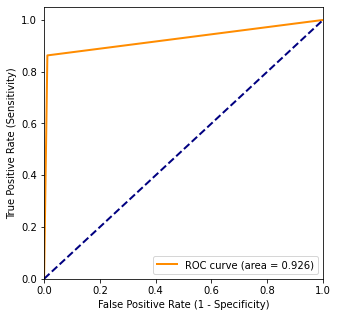

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(mlp_test_results['Personal Loan'], mlp_test_results['predicted'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()

In [ ]:
#####################################################
#####################################################
################## MLP Regressor    ################
#####################################################
#####################################################